## np.vstack

In [20]:
print("v1为:")
v1 = [[0, 1, 2, 3, 4, 5],
[6, 7, 8, 9, 10, 11]]
print(v1)
print("v2为:")
v2 = [[12, 13, 14, 15, 16, 17],
[18, 19, 20, 21, 22, 23]]
print(v2)
# 垂直拼接
result = np.vstack((v1, v2))
print("v1和v2垂直拼接的结果为")
print(result)

v1为:
[[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11]]
v2为:
[[12, 13, 14, 15, 16, 17], [18, 19, 20, 21, 22, 23]]
v1和v2垂直拼接的结果为
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


## 使用PCA去噪

### 回忆我们之前的例子

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5, size=100)

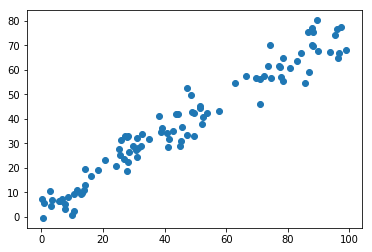

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

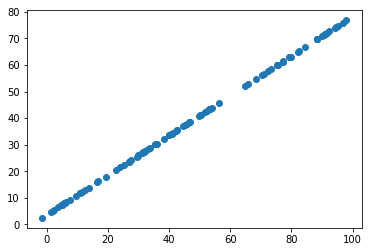

In [7]:
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

降维的过程可以理解成是去噪。

### 手写识别的例子

In [13]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [14]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)  # 给所有的数据集加上噪音

In [15]:
example_digits = noisy_digits[y==0,:][:10]  # 只取 y=0 的数据集[所有行,前10列]

In [21]:
'''
np.vstack就是垂直拼接
循环
第一次就是将0和1垂直拼接成01,
第二次将01和2拼接成012,依次累计
'''
for num in range(1,10):
    example_digits = np.vstack([example_digits, noisy_digits[y==num,:][:10]])

In [22]:
example_digits.shape

(190, 64)

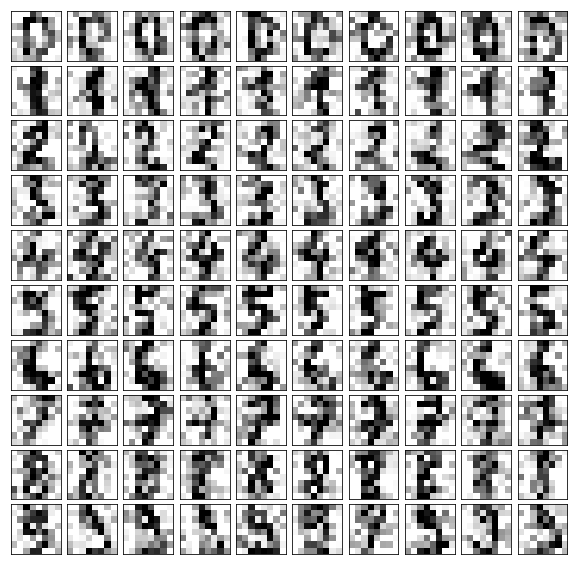

In [23]:
'''
自主绘制,
'''
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [24]:
pca = PCA(0.5).fit(noisy_digits)
pca.n_components_

12

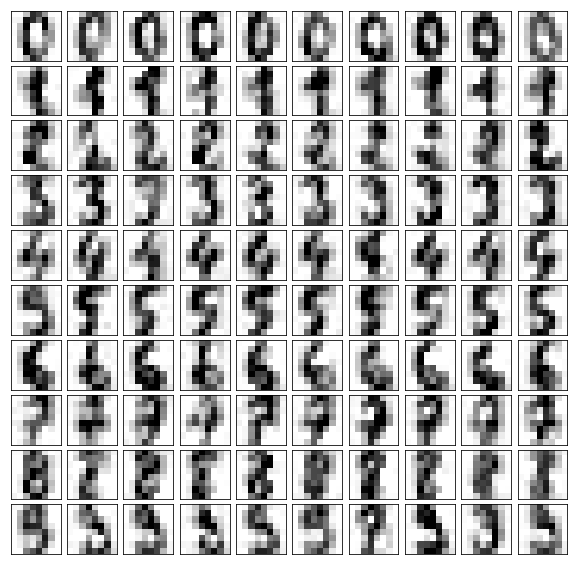

In [25]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)